# A Data Visualisation Project: Comparison of World Economic Indicators between the UK, and it's Former Colony Countries. 

### **<u>Introduction</u>**

The British Empire was one of the largest empires in history; and it's peak during the 19th and early 20th Century- it became the largest empire in history, cementing its place as the global powerhouse of its time. By 1920, the empire covered roughly 24% of the Earth's total land space (Price, 2006), leading to the popular phrase "the empire on which the sun never sets". The Empire's effect on its colonies were profound, and multifaceted; creating long-lasting cultural and economical transformations, globally. The dissolution of the empire resulted in a web of countries, former colonies, with vastly different economic trajectories (for one). The aim of this project is to utilise the World Economic Indicators dataset, sourced from the Maven Analytics Data Playground to compare the the UK, with four former-colonies to produce meaningful visualisations & analysis, and form conclusions between the countries. 

To test this, the project aims to compare the United Kingdom with four former colonies, stratified by their 2021 Human Development Index (HDI) classification:
- Very High HDI: Ireland
- High HDI: Guyana
- Medium HDI: India
- Low HDI: Nigeria

The Aim of the project is to utilise the 'WorldBank' and 'HDI' dataframes from the World Economic Indicators dataset, sourced from Maven Analytics Data Playground, to perform data analysis, and create meaningful visualisations, from which insights could be drawn comparing the rate of growth amongst differnt economic indicators between the UK and it's former colonies- to judge if the UK still has a global advantage over it's former colonies. 

One of this project are to successfully load, clean, wrangle the two datasets; preparing them to be used for analysis and visualisations. Another objective of this project is to successfully utilise various exploratory libraries to visualise temporal trends within various economic indicators through complex visualisations, such as subplots, small multiples, heatmaps and interactive visualisations. A final objective is to evaluate the results produced to draw comparisons between the UK and it's former colonies and draw insights into the difference between the economic growths between them, over time.




### **<u>Subject Review</u>**

Historically, the primary indicator for development used globally is the Gross Domestic Product; which is the measure of value added, that is created through the production of goods and services by a country in a set, certain period (OECD, 2022). However, it does not take into account how the gdp income is spread amomgst the population, therefore it is not a good indicator for overall well-being/standard of living for a country. A framework proposed by (Sen, 1999) in Development as Freedom suggests that the true development of a country is through its expansion of the capabilities of humans; their increased life expentancies, education rate and contribution to society. This shift of framework ideas opens the possibility to test the use of the Human Development Index (HDI) as the variable measurement of development, to compare the UK with four of its former colonies. 

A theory is introduced by (Acemoglu, Johnson and Robinson, 2001) which argues that the divergence of economic growth between colony countries was dependent on whether the coloniser, in this case the British Empire, deemed the countries they colonised as inclusive institutions or extractive institutions. In some colonies where the enviornment was non-significant, it was used to establish "neo-europes" where the society was designed to mirror the UK- it is predicted that these countries will have the very high HDI outcomes. In the colonoes that were resourse-rich but higher mortality rates or societal norms they judged to be sub-standard, they were treated as "extractive states", where resoruces were extracted out, purely as a means for the transfer of wealth back to the Empire. It is predicted that these countries will be the ones where the effects of the empire will be longer lasting, creating "path-dependence" and will have the lower HDI classifications. 

### **<u>Import Statements</u>**

To analyse the data, first it was required to import several libraries to help with the data analytics and visualisation. The pandas and numpy libraries are the industry standard for data science to be used in data analytics; pandas provides the DataFrame structure whilst numpy provides the mathematical backend- which therfore allows us to analyse complex, highly-dimensional datasets and ensuring computational efficiency (Ayd and Harrison, 2024). The Matplotlib, Seaborn and HvPlot libraries are data visualisation libraries, used to produce visualisations. Matplotlib is the set standard, allowing for visualisaitons because it allows total control; allowing you to control every single pixel of the visualisation, exporting the visualisation to any format required. It is very versatile; allowing for various types of visualisations (basic such as scatter plots, bar charts & histograms, statistical such as box plots and complex such as 3D plotting & heatmaps). The Seaborn library works within the pandas dataframe; it is capable of handling statistical aggregation automatically to create informative, complex and statistical visualisations. The HvPlot library is used to interactive visualisations allowing for zooming and hovering over data in a visualisation for further information- making it a very useful tool for exploring large and complex datasets. Finally, the humanize and functools are utility libraries; humanize allows the conversion of raw numbers into human-readable strings; allowing for an easier and more effective communication of data.

The dataframes are set to display upto 100 columns, which allows for careful data integrity checks of large dataframe to check that data exists for analysis. 

Visualisation is set to add gridlines to the background of the charts produced; which allows for accurately and easily interpret data off charts/graphs. The default colour cycle is also set to a colourblind palette; colourblindness is common affecting roughly 1 in 12 men and 1 in 200 women (Almustanyir, 2025). Therefore setting the cycle to a colourblind palette allows for inclusive accessibility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize
from functools import partial
import seaborn as sns
import hvplot.pandas

pd.set_option("display.max_columns", 100)

# Set visualisation style
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Set figure quality
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300

The dataset used for this analytics project was sourced from the Maven Analytics Data Playground. This was the choice of repository because Maven Analytics provides datasets that are curated. Instead of using wild data that would require hours and hours of cleaning before it is usable for any level of anaytics, using curated data allows the dataset to be accessible to a novice data analyst to conduct essential data manipulation in order to prepare the datasets for analysis and visualisation. 

The dataset sourced from Maven Analytics Data Playground is called 'World Economic Indicators'; which contains two dataframes- one dataframe is called WorldBank was sourced from the World Bank and the other dataframe is called HDI and it was sourced from the United Nations Development Programme. The WorldBank dataframe contains important indicators of economic development from 1960 - 2018, including fields such as GDP, GDP per capita, birthrate, deathrate and life expectancy- and it will allow us to analyse the changes in these trends over the years across countries globally. The HDI dataframe contains the Human Development Index (HDI) score for each country (used by the UN to class how developed a country is), along with other indictaors used to track development such as education rates, labour participation rates, demogrpahics amongst politics and the ineqality in gender. This dataset is primed to allow for an effective data cleaning, wrangling process to then produce effective visualisations and analysis. 

### **<u>Loading Dataframes</u>**

Firstly, the dataframes must be loaded individually to the notebook. The pd.read_csv(...) is a fucntion from the pandas library that allows for the parsing of 'comma separated values' files (csv); converting the raw text file into a pandas dataframe. Both dataframes; hdi & wb, are now available to be used.

The print function is used to output the text representation of the dataframes, allowing for sanity checks to ensure the data was separated correctly. The empty print fucntion in between print(hdi) and print(wb) is used to create a visual whitespace, so that the two dataframes don't merge together. 

The print () display is not the recommended method for displaying the dataframes. Simply typing the variable name will output a much better looking, scrollable table that is visually more pleasing- however when printing the notebook as a pdf- the table will be limited by size and it won't be possible to view all the colums. The print () is used because it outputs all the columns in the dataframe. Better visualisation suggestion is commented in the cells, for output simply uncomment the cell. This will be done throughout the notebook. 

In [2]:
hdi = pd.read_csv("HDI.csv")
wb = pd.read_csv("WorldBank.csv")

print(hdi)
print()
print(wb)

# For better better display of the dataframes in Jupyter notebooks, uncomment the lines below
# hdi
# wb

          iso3                          country    hdicode region  \
0          AFG                      Afghanistan        Low     SA   
1          AGO                           Angola     Medium    SSA   
2          ALB                          Albania       High    ECA   
3          AND                          Andorra  Very High    NaN   
4          ARE             United Arab Emirates  Very High     AS   
..         ...                              ...        ...    ...   
201    ZZG.ECA          Europe and Central Asia        NaN    NaN   
202    ZZH.LAC  Latin America and the Caribbean        NaN    NaN   
203     ZZI.SA                       South Asia        NaN    NaN   
204    ZZJ.SSA               Sub-Saharan Africa        NaN    NaN   
205  ZZK.WORLD                            World        NaN    NaN   

     hdi_rank_2021  hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  \
0            180.0     0.273     0.279     0.287     0.297     0.292   
1            148.0       Na

In the cell below: a merge function is being performed; an inner join is conducted to merge both the hdi and wb dataframes together horizontally based on a common key- which in this case is the 'iso3' column in the left dataframe (the hdi dataframe) and the 'Country Code' column from the right dataframe (the wb dataframe) and it forms an inner join- creating a very highly dimensional dataframe with over 11328 rows. While merging the dataframes allows the verification that every country being analysed contains both a HDI classification and valid economic indicators- it also creates a super wide data-frame, making it very difficult to work with. Therefore, it's been decided to work with each dataframe seperately. 

In [3]:
# merging just for the sake of merging because hdi has a lot of info in
# columns while all the info in wb is in rows
# Also hdi dataset has 1023 columns, which makes working with the merged df very difficult

merged_df = pd.merge(hdi, wb, left_on="iso3", right_on="Country Code")
print(merged_df)

# For better better display of the dataframe in Jupyter notebooks, uncomment the line below
# merged_df

      iso3      country hdicode region  hdi_rank_2021  hdi_1990  hdi_1991  \
0      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
1      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
2      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
3      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
4      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
...    ...          ...     ...    ...            ...       ...       ...   
11323  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11324  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11325  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11326  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11327  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   

       hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998

In the next three cells below; data inspection was undergone to quantify the dimensions of the dataframes; the f string combines text and variables for clear output; the len(...) calculates the number of rows and columns. The third line of code for each cell allows to convert the column names index into a list and print them all. This allows for inspection of the data before deciding the next steps. 

In [4]:
print("Information about HDI Dataset")
print(f"Dataset loaded: {len(hdi)} rows, {len(hdi.columns)} columns")
print(f"\nColumn names:\n{list(hdi.columns)}")

Information about HDI Dataset
Dataset loaded: 206 rows, 1008 columns

Column names:
['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'le_1990', 'le_1991', 'le_1992', 'le_1993', 'le_1994', 'le_1995', 'le_1996', 'le_1997', 'le_1998', 'le_1999', 'le_2000', 'le_2001', 'le_2002', 'le_2003', 'le_2004', 'le_2005', 'le_2006', 'le_2007', 'le_2008', 'le_2009', 'le_2010', 'le_2011', 'le_2012', 'le_2013', 'le_2014', 'le_2015', 'le_2016', 'le_2017', 'le_2018', 'le_2019', 'le_2020', 'le_2021', 'eys_1990', 'eys_1991', 'eys_1992', 'eys_1993', 'eys_1994', 'eys_1995', 'eys_1996', 'eys_1997', 'eys_1998', 'eys_1999', 'e

In [5]:
print("Information about WorldBank Dataset")
print(f"Dataset loaded: {len(wb)} rows, {len(wb.columns)} columns")
print(f"\nColumn names:\n{list(wb.columns)}")

Information about WorldBank Dataset
Dataset loaded: 12449 rows, 15 columns

Column names:
['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)', 'Electric power consumption (kWh per capita)', 'GDP (USD)', 'GDP per capita (USD)', 'Individuals using the Internet (% of population)', 'Infant mortality rate (per 1,000 live births)', 'Life expectancy at birth (years)', 'Population density (people per sq. km of land area)', 'Unemployment (% of total labor force) (modeled ILO estimate)']


In [6]:
print("Information about Merged Dataset")
print(f"Dataset loaded: {len(merged_df)} rows, {len(merged_df.columns)} columns")
print(f"\nColumn names:\n{list(merged_df.columns)}")

Information about Merged Dataset
Dataset loaded: 11328 rows, 1023 columns

Column names:
['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'le_1990', 'le_1991', 'le_1992', 'le_1993', 'le_1994', 'le_1995', 'le_1996', 'le_1997', 'le_1998', 'le_1999', 'le_2000', 'le_2001', 'le_2002', 'le_2003', 'le_2004', 'le_2005', 'le_2006', 'le_2007', 'le_2008', 'le_2009', 'le_2010', 'le_2011', 'le_2012', 'le_2013', 'le_2014', 'le_2015', 'le_2016', 'le_2017', 'le_2018', 'le_2019', 'le_2020', 'le_2021', 'eys_1990', 'eys_1991', 'eys_1992', 'eys_1993', 'eys_1994', 'eys_1995', 'eys_1996', 'eys_1997', 'eys_1998', 'eys_1999

The next two cells generates the technical summary of each of the dataframes. It displays the number of columns and lists them, the total number of rows, the non-null counts, and the data types of each column. This allows for the identification of missing values (if null values are sutracted from the RangeIndex value), and allows to formulate a plan for cleaning the data for visualisation. 

In [7]:
print(wb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [8]:
print(hdi.info())
# Please note that the hdi dataframe is too large to print information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6+ MB
None


### **<u>Data Cleaning</u>**

#### <u>Data Cleaning for WorldBank Dataframe</u>

The cell below displays the code used to display the exact count of missing data (NaNs) for every single column in the wb dataframe. This display allows for the formulation of a plan to handle these missing values as part of the data cleaning process. 

In [9]:
wb.isnull().sum()

Country Name                                                       0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
Year                                                               0
Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor for

The cell below converts the the year to a datetime, and then an integer. pd.to_datetime allows the strings to be read as actual dates, and the format="%Y" formats this to a 4 digit year, the .dt pulls out the year integer out of the full date into a new column. This column is automatically appended to the end of the dataframe ([:-1]). Then the old column is deleted (wb.drop), and then the new column is sliced from the last position and inserted at index position 4. The new dataframe is then reassigned back to wb. 

In [10]:
wb["Year"] = pd.to_datetime(wb["Year"], format="%Y")

wb["year"] = wb["Year"].dt.year

wb = wb.drop(columns=["Year"])

wb_columns = list(wb.columns)

wb_columns = wb_columns[:-1]

wb_columns.insert(4, "year")

wb = wb[wb_columns]

# Uncomment the line below to view the new dataframe, in its optimal visual output for Jupyter notebooks
# wb

Performing a wb.isnull().sum() for the specific year 2018 showed that all the values in the given columns are NaNs- if the data is 100% mising, then performing imputations is not possible or recommended to handle these missing values- since it would produce speculative variance. To maintain the integrity of the dataset, the year 2018 was excluded from the dataset. The new dataframe is reasisgned back to wb, and is printed to display that 2017 is the latest. 

In [11]:
# Based on the printed information, we can see that the data points for the given columns in consideration are all NaNs, hence I have decided to drop the year 2018 for all countries altogether

latest_year = wb["year"].max()
print(latest_year)
data_columns_in_consideration = [
    "Birth rate, crude (per 1,000 people)",
    "Death rate, crude (per 1,000 people)",
    "Electric power consumption (kWh per capita)",
    "Life expectancy at birth (years)",
]

print(wb[wb["year"] == latest_year][data_columns_in_consideration].isnull().sum())
print(
    f"Total rows of the WorldBank dataframe, filtered on the year 2018 = {len(wb[wb['year'] == latest_year])}"
)

wb = wb.drop(index=wb[wb["year"] == latest_year].index)
wb

2018
Birth rate, crude (per 1,000 people)           211
Death rate, crude (per 1,000 people)           211
Electric power consumption (kWh per capita)    210
Life expectancy at birth (years)               211
dtype: int64
Total rows of the WorldBank dataframe, filtered on the year 2018 = 211


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,NaN,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1964,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1963,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1962,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1961,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


The cell below is a sanity check, it is checking to see if there are any duplicates within the dataframe. It is deduced there are not, since the column and row numbers are the same.

In [12]:
wb.shape, wb.drop_duplicates().shape

((12238, 15), (12238, 15))

In [13]:
for cc in data_columns_in_consideration:
    print("=" * 50)
    print(f"Column = {cc}")
    print(wb[cc].describe())
    print()

Column = Birth rate, crude (per 1,000 people)
count    11440.000000
mean        28.643276
std         13.131893
min          6.900000
25%         16.600000
50%         27.545500
75%         40.881250
max         58.227000
Name: Birth rate, crude (per 1,000 people), dtype: float64

Column = Death rate, crude (per 1,000 people)
count    11416.000000
mean        10.588539
std          5.489382
min          1.127000
25%          6.863750
50%          9.200000
75%         12.687000
max         54.444000
Name: Death rate, crude (per 1,000 people), dtype: float64

Column = Electric power consumption (kWh per capita)
count     5847.000000
mean      3175.837750
std       4467.328288
min          0.000000
25%        390.530500
50%       1542.570000
75%       4313.995000
max      54799.200000
Name: Electric power consumption (kWh per capita), dtype: float64

Column = Life expectancy at birth (years)
count    11176.000000
mean        64.044692
std         11.491087
min         18.907000
25%       

To handle the NaNs of the data, statistical imputation was performed to fill in the missing values. Linear Intrapolation was conducted; typically economic data like GDP and GDP per capita usually follows a trend and does not jump randomly- it was deemed that it would be a safe choice for inputation to fill in the missing values. A mean imputation would have flattened the variance, therefore distorting the trend- thus a linear intrapolation was selected as the method to fill in the missing values. 

The code excludes the first 5 rows from the intrapolation, and begins from the fifth index number onwards. The sort values function first by country means you don't accidentally intrapolate values between different countries, and then by year ensures that the timeline remains linear. 

In [14]:
numeric_columns_to_interpolate = list(wb.columns)[5:]

wb = wb.sort_values(by=["Country Name", "year"])

wb[numeric_columns_to_interpolate] = wb[numeric_columns_to_interpolate].interpolate(
    method="linear", limit_direction="both"
)

wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,532.028,5.377780e+08,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,532.028,5.488890e+08,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,532.028,5.466670e+08,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,532.028,7.511110e+08,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,532.028,8.000000e+08,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,628.747,1.909100e+10,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,609.126,1.949550e+10,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,609.126,1.996310e+10,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,609.126,2.054870e+10,1464.5800,23.1200,36.3,60.294,36.2683,5.239


The cell below is essentially a sanity check; used to display the exact count of missing data (NaNs) for every single column in the wb dataframe after the datacleaning process. Since there are no NaNs present, we can conclude that all the missing data has been dealt with, and the dataframe is ready for analysis.

In [15]:
print(wb.isnull().sum())

Country Name                                                    0
Country Code                                                    0
Region                                                          0
IncomeGroup                                                     0
year                                                            0
Birth rate, crude (per 1,000 people)                            0
Death rate, crude (per 1,000 people)                            0
Electric power consumption (kWh per capita)                     0
GDP (USD)                                                       0
GDP per capita (USD)                                            0
Individuals using the Internet (% of population)                0
Infant mortality rate (per 1,000 live births)                   0
Life expectancy at birth (years)                                0
Population density (people per sq. km of land area)             0
Unemployment (% of total labor force) (modeled ILO estimate)    0
dtype: int

#### <u>Data Cleaning for HDI Dataframe</u>

The cell below displays the code used to display the exact count of missing data (NaNs) for every single column in the hdi dataframe. This display allows for the formulation of a plan to handle these missing values as part of the data cleaning process. 

In [16]:
hdi.isnull().sum()

iso3              0
country           0
hdicode          15
region           55
hdi_rank_2021    15
                 ..
mf_2017          38
mf_2018          38
mf_2019          38
mf_2020          38
mf_2021          38
Length: 1008, dtype: int64

In [17]:
hdi[hdi["mf_2017"].isnull()]

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,...,co2_prod_2004,co2_prod_2005,co2_prod_2006,co2_prod_2007,co2_prod_2008,co2_prod_2009,co2_prod_2010,co2_prod_2011,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021,mf_1990,mf_1991,mf_1992,mf_1993,mf_1994,mf_1995,mf_1996,mf_1997,mf_1998,mf_1999,mf_2000,mf_2001,mf_2002,mf_2003,mf_2004,mf_2005,mf_2006,mf_2007,mf_2008,mf_2009,mf_2010,mf_2011,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818,0.825,0.832,0.841,0.833,0.833,0.848,0.847,0.850,0.848,0.848,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858,78.4063,77.9805,80.3241,78.6633,82.6380,78.9616,80.3340,80.9439,79.4259,81.3173,80.9193,81.6857,82.2368,...,7.352579,7.293925,6.740583,6.514078,6.422575,6.116524,6.117538,5.862658,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATG,Antigua and Barbuda,High,LAC,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802,0.801,0.795,0.790,0.783,0.787,0.787,0.789,0.791,0.794,0.795,0.798,0.800,0.788,0.788,73.4922,73.4354,73.4168,73.4819,73.5912,73.6363,73.8291,73.9603,74.0413,74.3467,74.6058,75.0781,75.5357,...,4.560844,4.587614,4.651770,4.840169,4.891273,5.110783,5.161312,4.967228,5.065867,5.044582,4.987576,5.129855,5.194072,5.145139,5.175207,5.008031,4.395123,4.395123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,BRB,Barbados,High,LAC,70.0,0.725,0.727,0.727,0.731,0.736,0.739,0.744,0.747,0.748,0.750,0.756,0.756,0.760,0.765,0.770,0.776,0.781,0.786,0.789,0.791,0.788,0.784,0.787,0.787,0.789,0.791,0.794,0.796,0.797,0.799,0.788,0.790,72.7516,72.8430,72.9152,73.1904,73.2113,73.2983,73.5458,73.5475,73.7278,74.0387,74.0891,74.2467,74.3656,...,4.611601,4.774123,4.839320,4.889846,5.759325,5.681527,5.189079,5.358903,5.143091,5.055294,4.427967,4.420939,4.490616,4.086895,4.310270,4.234126,3.781470,3.781470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,COM,Comoros,Medium,SSA,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.464,0.470,0.474,0.479,0.482,0.488,0.494,0.500,0.507,0.513,0.520,0.527,0.533,0.539,0.540,0.544,0.548,0.553,0.557,0.560,0.562,0.558,55.8404,56.1941,56.7330,57.2762,57.6940,58.0146,58.3444,58.3899,58.4068,58.7809,58.7565,59.1631,59.0556,...,0.245400,0.233639,0.263208,0.165612,0.167248,0.201366,0.233757,0.202245,0.212593,0.247065,0.212302,0.230942,0.271722,0.328631,0.352171,0.359437,0.297217,0.297217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,CPV,Cabo Verde,Medium,SSA,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569,0.576,0.587,0.593,0.597,0.606,0.620,0.629,0.635,0.639,0.644,0.653,0.656,0.666,0.667,0.663,0.670,0.675,0.673,0.676,0.662,0.662,65.0227,65.1762,65.3180,65.3121,65.2504,64.0928,65.7627,66.3779,66.9928,67.5686,68.6183,69.9287,70.7054,...,0.722181,0.949567,1.007439,1.064350,0.975352,1.069080,1.130469,1.233921,0.993538,0.966569,0.940261,0.935658,1.014053,1.077046,1.098320,1.095129,0.989106,0.989106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,DMA,Dominica,High,LAC,10

Since the HDI dataframe is so large, it is extremely diffuclt to manually inspect all the variables in the dataframe- therefore a custom feature extraction algorithm was introduced - this allows us to be able to extract the unique column headers from the dataframe- since the dataframe has collated year-economic indicator, for each year between 1990-2021 (eading to the reason why the dataframe is so large); it allows us to separate out the economic indicator from the temporal identifier (specifically the _YYYY suffix), therefore it produces a list of the unique economic indicators. This identifies the potential metrics of the dataframe for analysis. This step was done through reserach through the Stack Overflow community and the help of AI. 

In [18]:
def get_unique_column_headers(df: pd.DataFrame):
    """
    Get the unique column headers (ex. if input hdi_2019, output is just hdi)
    from a dataframe
    """
    unique_col_headers = []
    columns = df.columns

    for col in columns:
        # check if last 3 characters in column name are digits (format of column names in df)
        if col[-4:-1].isdigit():
            # Append if not already in list
            if col[:-5] not in unique_col_headers:
                # Append only upto last 5 characters, ignoring the _XXXX year
                unique_col_headers.append(col[:-5])

    return unique_col_headers

Before running a complex melt function, it is imperative to test it out on a small dataframe, so a temporary dataframe was made with just one row- the united states- and then testing to see whether to see if the function was successful. Then, to prepare for the melting funciton of the hdi dataframe, meltstubs variable is created, with the unique columns produced above. They are then displayed, listing all the unique economic factors.

In [19]:
temp = hdi[hdi["country"] == "United States"]
temp.melt(
    id_vars=["iso3", "country", "hdicode", "region"],
    var_name="Attributes",
    value_name="Values",
)

melt_stubs = get_unique_column_headers(hdi)
melt_stubs

['hdi_rank',
 'hdi',
 'le',
 'eys',
 'mys',
 'gnipc',
 'gdi_group',
 'gdi',
 'hdi_f',
 'le_f',
 'eys_f',
 'mys_f',
 'gni_pc_f',
 'hdi_m',
 'le_m',
 'eys_m',
 'mys_m',
 'gni_pc_m',
 'ihdi',
 'coef_ineq',
 'loss',
 'ineq_le',
 'ineq_edu',
 'ineq_inc',
 'gii_rank',
 'gii',
 'mmr',
 'abr',
 'se_f',
 'se_m',
 'pr_f',
 'pr_m',
 'lfpr_f',
 'lfpr_m',
 'rankdiff_hdi_phdi',
 'phdi',
 'diff_hdi_phdi',
 'co2_prod',
 'mf']

With the stubnames now generated- we can perform a pd.wide_to_long function to melt the dataframe; simultaneous reshaping of the multiple economic indicators is being performed- converting this wide dataframe into a panel dataset. This completed dataset is now transformed from a high-dimensional wide format into a panel format into a tidy long format (the number of columns reduced down to 45, from over 1000). This new dataframe is assigned a new variable; hdim, which will be the one used from this moment on. This allows for a much easier statistical analysis. This step was done through reserach through the Stack Overflow community and the help of AI. 

In [20]:
hdi_renamed = hdi.rename(columns={"hdi_rank_2021": "static_hdi_rank_2021"})
id_vars = ["iso3", "country", "hdicode", "region", "static_hdi_rank_2021"]

hdim = pd.wide_to_long(
    hdi_renamed,
    stubnames=melt_stubs,
    i=id_vars,
    j="year",
    sep="_",
    suffix=r"\d+",  # Regular expression to find the year (digits) at the end
)
hdim = hdim.reset_index()
hdim

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,Afghanistan,Low,SA,180.0,1990,NaN,0.273,45.967200,2.504050,0.971125,2684.550019,NaN,0.595,0.196280,48.397300,1.970663,0.342503,668.055760,0.329910,43.708800,3.939093,1.311020,4700.298515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,142.960000,0.700485,5.419459,NaN,NaN,15.180000,77.430000,NaN,0.270,1.098901,0.209727,2.330000
1,AFG,Afghanistan,Low,SA,180.0,1991,NaN,0.279,46.663100,2.806550,1.019356,2276.289409,NaN,0.588,0.196378,49.143900,2.096679,0.371860,564.926374,0.334046,44.352800,4.171640,1.385486,3987.412921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.000000,147.525000,0.772361,5.583395,NaN,NaN,15.214000,77.176000,NaN,0.276,1.075269,0.182525,2.280000
2,AFG,Afghanistan,Low,SA,180.0,1992,NaN,0.287,47.595500,3.109050,1.067586,2059.868084,NaN,0.586,0.199362,50.319700,2.230753,0.401218,508.750730,0.340228,45.069700,4.417915,1.459952,3611.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.000000,147.521000,0.844236,5.747332,NaN,NaN,15.223000,76.871000,NaN,0.284,1.045296,0.095233,2.350000
3,AFG,Afghanistan,Low,SA,180.0,1993,NaN,0.297,51.466400,3.411550,1.115817,1525.533426,NaN,0.548,0.195311,52.738900,2.373401,0.430575,374.581093,0.356374,50.216400,4.678730,1.534418,2675.906967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.000000,147.896000,0.916112,5.911269,NaN,NaN,15.197000,76.580000,NaN,0.294,1.010101,0.084285,2.100000
4,AFG,Afghanistan,Low,SA,180.0,1994,NaN,0.292,51.494500,3.714050,1.164047,1087.961890,NaN,0.524,0.182092,53.544200,2.525171,0.459933,266.207610,0.347560,49.530700,4.954942,1.608884,1908.508902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1540.000000,155.669000,0.987988,6.075205,NaN,NaN,15.178000,76.330000,NaN,0.289,1.027397,0.075054,1.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,ZZK.WORLD,World,NaN,NaN,NaN,2017,NaN,0.733,72.568952,12.708571,8.439513,16022.410060,NaN,0.953,0.713534,75.071453,12.812688,8.121633,11503.715480,0.748349,70.174067,12.609249,8.791220,20480.428610,0.586,19.893876,20.054570,14.382342,21.717302,23.581983,NaN,0.468,205.695062,44.995391,62.321681,69.041016,23.504026,76.495974,47.660952,73.709811,NaN,0.667,9.004093,4.560921,12.277878
6588,ZZK.WORLD,World,NaN,NaN,NaN,2018,NaN,0.736,72.816114,12.712662,8.520606,16372.224530,NaN,0.955,0.717232,75.286297,12.806977,8.231065,11830.087290,0.751298,70.443289,12.624672,8.842350,20854.232000,0.590,19.795655,19.836957,14.041231,21.834272,23.511460,NaN,0.466,209.827482,44.140624,63.063218,69.410310,24.099032,75.900967,47.548634,73.468565,NaN,0.669,9.103261,4.601945,12.220286
6589,ZZK.WORLD,World,NaN,NaN,NaN,2019,NaN,0.739,73.012099,12.731804,8.612013,16652.533510,NaN,0.956,0.720973,75.481771,12.829020,8.355205,12081.697000,0.753882,70.637954,12.640263,8.904471,21164.172210,0.594,19.586861,19.621110,13.736278,21.585308,23.438998,NaN,0.465,215.000481,43.433319,64.164791,70.281129,24.671115,75.328885,47.660991,73.293526,NaN,0.672,9.066306,4.560754,12.375236
6590,ZZK.WORLD,World,NaN,NaN,NaN,2020,NaN,0.735,72.257297,12.798925,8.635057,15963.888970,NaN,0.957,0.717038,74.857389,12.873135,8.377582,11647.355850,0.749037,69.800146,12.729387,8.928489,20227.047490,0.591,19.395426,19.591837,13.388240,21.604589,23.193448,NaN,0.465,220.185792,42.805263,64.349182,70.482968,25.371184,74.628816,45.822577,71.305890,NaN,0.670,8.843537,4.297988,12.325166


The cell below is a sanity check, it is checking to see if there are any duplicates within the dataframe. It is deduced there are not, since the column and row numbers are the same.

In [21]:
hdim.shape, hdim.drop_duplicates().shape

((6592, 45), (6592, 45))

This function is used to display the exact count of missing data (NaNs) for every single column in the wb dataframe after the datacleaning process.The decision has been taken to not to perform a linear interpolation here, since there are too many columns, and each column would require its own unique imputing technique depending on how many values are present or absent in each one. It had therefore been decided to use the hdim dataframe as it is now, for analysis.

In [22]:
hdim.isnull().sum()

iso3                       0
country                    0
hdicode                  480
region                  1760
static_hdi_rank_2021     480
year                       0
hdi_rank                6592
hdi                      669
le                         0
eys                      321
mys                      579
gnipc                    132
gdi_group               6420
gdi                     1376
hdi_f                   1376
le_f                       0
eys_f                    726
mys_f                    910
gni_pc_f                 565
hdi_m                   1376
le_m                       0
eys_m                    726
mys_m                    910
gni_pc_m                 565
ihdi                    4724
coef_ineq               4724
loss                    4724
ineq_le                 4120
ineq_edu                4481
ineq_inc                4638
gii_rank                6422
gii                     1387
mmr                      352
abr                        0
se_f          

A final data cleaning step here was to filter out the regions from the hdim dataframe- this was done through focussing on the iso3 column. It was deduced that any row with an iso3 code longer than 3 letters was referring to a refion, and not a country- therefore in the cell below- filtering is taking place; the result being that in tne newly-reassigned hdim variable, only rows with an iso3 with length 3 will be displayed. The new hdmi dataframe is displayed, as a sanity check

In [23]:
hdim = hdim[hdim["iso3"].str.len() == 3]
hdim

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,Afghanistan,Low,SA,180.0,1990,NaN,0.273,45.9672,2.504050,0.971125,2684.550019,NaN,0.595,0.196280,48.3973,1.970663,0.342503,668.055760,0.329910,43.7088,3.939093,1.311020,4700.298515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,142.960,0.700485,5.419459,NaN,NaN,15.180,77.430,NaN,0.270,1.098901,0.209727,2.33
1,AFG,Afghanistan,Low,SA,180.0,1991,NaN,0.279,46.6631,2.806550,1.019356,2276.289409,NaN,0.588,0.196378,49.1439,2.096679,0.371860,564.926374,0.334046,44.3528,4.171640,1.385486,3987.412921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.0,147.525,0.772361,5.583395,NaN,NaN,15.214,77.176,NaN,0.276,1.075269,0.182525,2.28
2,AFG,Afghanistan,Low,SA,180.0,1992,NaN,0.287,47.5955,3.109050,1.067586,2059.868084,NaN,0.586,0.199362,50.3197,2.230753,0.401218,508.750730,0.340228,45.0697,4.417915,1.459952,3611.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.0,147.521,0.844236,5.747332,NaN,NaN,15.223,76.871,NaN,0.284,1.045296,0.095233,2.35
3,AFG,Afghanistan,Low,SA,180.0,1993,NaN,0.297,51.4664,3.411550,1.115817,1525.533426,NaN,0.548,0.195311,52.7389,2.373401,0.430575,374.581093,0.356374,50.2164,4.678730,1.534418,2675.906967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.0,147.896,0.916112,5.911269,NaN,NaN,15.197,76.580,NaN,0.294,1.010101,0.084285,2.10
4,AFG,Afghanistan,Low,SA,180.0,1994,NaN,0.292,51.4945,3.714050,1.164047,1087.961890,NaN,0.524,0.182092,53.5442,2.525171,0.459933,266.207610,0.347560,49.5307,4.954942,1.608884,1908.508902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1540.0,155.669,0.987988,6.075205,NaN,NaN,15.178,76.330,NaN,0.289,1.027397,0.075054,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,ZWE,Zimbabwe,Medium,SSA,146.0,2017,NaN,0.594,60.7095,11.853943,8.461690,3728.918785,NaN,0.952,0.578847,62.9561,11.682607,8.061880,3237.357805,0.607765,58.2078,12.039037,8.916270,4282.085034,0.456,23.076460,23.232323,25.407349,16.80576,27.01627,NaN,0.532,458.0,98.265,59.792019,70.783081,36.151604,63.848396,80.285,89.608,NaN,0.585,1.515152,0.673026,2.26
6236,ZWE,Zimbabwe,Medium,SSA,146.0,2018,NaN,0.602,61.4141,11.981767,8.585395,3864.012419,NaN,0.952,0.586386,63.5940,11.822753,8.178377,3354.306230,0.615945,58.9685,12.154317,9.052420,4437.031129,0.463,22.832887,23.089701,24.676630,16.80576,27.01627,NaN,0.535,458.0,98.507,60.772083,71.608974,34.285714,65.714286,80.309,89.496,NaN,0.593,1.495017,0.821010,2.05
6237,ZWE,Zimbabwe,Medium,SSA,146.0,2019,NaN,0.601,61.2925,12.110969,8.710909,3674.564482,NaN,0.955,0.586433,63.6614,11.964580,8.296558,3189.749406,0.614091,58.6436,12.270700,9.190648,4219.085137,0.463,22.682058,22.961730,24.672134,14.60503,28.76901,NaN,0.533,458.0,97.354,61.768211,72.444503,34.571429,65.428571,80.339,89.358,NaN,0.594,1.164725,0.747610,1.21
6238,ZWE,Zimbabwe,Medium,SSA,146.0,2020,NaN,0.600,61.1242,12.110969,8.710909,3654.289051,NaN,0.959,0.586722,63.8616,11.964580,8.296558,3152.773128,0.611493,58.1294,12.270700,9.190648,4216.869734,0.463,22.518490,22.833333,24.181431,14.60503,28.76901,NaN,0.533,458.0,96.180,61.768211,72.444503,34.571429,65.428571,78.980,88.697,NaN,0.594,1.000000,0.708562,1.21


### **<u>Data Wrangling</u>**

#### <u>Data wrangling for WorldBank Dataframe</u>

A function is created since it has been deduced that reordering columns in the wb dataframe is required, as part of the data wrangling process. This fucntion is created so that you don't repeat yourself and write the same code repeatedly. Any new columns added append to the end of the dataframe automatically, therefore this function removes the item from the last position of the list (-1) and inserts it into the column you specify.

In [24]:
# Code re-use. Create a function to reorder columns


def reorder_columns(df, position_to, position_from=-1):
    columns = list(df.columns)
    column_to_move = columns.pop(position_from)
    columns.insert(position_to, column_to_move)

    return df[columns]

The GDP (USD) column contains massive integers that are very hard to read. The humanize library assists with this, it allows the conversion of this massive integer into text that makes it read/digest. The partial function is from the functool library, and it allows you to freeze certain parts of a function- such as with the 'format="%0.2f'- it means the format is permanently set to 2 decimal places. This fucntion allowed the GDP (USD) to be converted into a new column, with a more readable format. Using the reorder_columns function created above, the human-readable GDP column was the shifted to index number 9 of the dataframe, as displayed below. 

In [25]:
wb["GDP_USD"] = wb["GDP (USD)"].apply(partial(humanize.intword, format="%0.2f"))
wb = reorder_columns(wb, 9)
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239


A mathematical calculation was carried out to produce a new variable; a new economic indicator. Natural increase rate was calculated by subtracting the death rate from the birth date- inserting this into a new column. Then the reorder_columns function was utilised to shift this column at index number 7, following the birth & death rate variables on the dataframe. This is printed in the dataframe. 

In [26]:
wb["Natural Increase Rate (Per 1,000 people)"] = (
    wb["Birth rate, crude (per 1,000 people)"]
    - wb["Death rate, crude (per 1,000 people)"]
)
wb = reorder_columns(wb, 7)
wb

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_16195/2484991396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb["Natural Increase Rate (Per 1,000 people)"] = (


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,19.724,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,20.364,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,20.979,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,21.567,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,25.653,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,25.701,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,25.308,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,24.578,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239


A mathematical calculation was carried out to produce a new variable; a new economic indicator. Estimated population was calculated by dividing the GDP by the GDP per capita, which generates the estimated population. The partial(humanize.intword, format="%0.2f") function was applied to first convert the new figure into a readable number, ensuring it is to 2 decimal places. This could be found in the dataframe, on the last column. This was the final data wrangling step, therefore the wb dataset is now ready to use for analysis.

In [27]:
wb["Estimated Population"] = wb["GDP (USD)"] / wb["GDP per capita (USD)"]
wb["Estimated Population (readable)"] = wb["Estimated Population"].apply(
    partial(humanize.intword, format="%0.2f")
)
wb

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_16195/704848066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb["Estimated Population"] = wb["GDP (USD)"] / wb["GDP per capita (USD)"]
/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_16195/704848066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb["Estimated Population (readable)"] = wb["Estimated Population"].apply(


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,19.724,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976,9.169408e+06,9.17 million
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,20.364,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976,9.351449e+06,9.35 million
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,20.979,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976,9.543201e+06,9.54 million
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,21.567,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976,9.744784e+06,9.74 million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,25.653,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623,1.335035e+07,13.35 million
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,25.701,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518,1.358666e+07,13.59 million
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,25.308,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438,1.381462e+07,13.81 million
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,24.578,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239,1.403044e+07,14.03 million


#### <u>Data wrangling for HDI Dataframe</u>

It has been decided not to conduct any data wrangling for the hdim dataset because there are too many columns, and the values are small. It has been differentiated due to the melting conducted in the data cleaning process, and it was deduced that there would not be any value added by wranging the data. Therefore the hdim dataset is ready to use for analysis.

In [28]:
# hdim

### <u>**Data Visualisations**</u>

The brief of the project is to produce an analysis, comparing the UK with four countries that were once colonies of British Empire. The countries were separated by the hdi code from the hdim dataframe; with each selected country from a different hdi code: one country has a very high classification, one has a high classification, one has a medium classification and one has a low classification. hdim["hdicode"].unique() function was used to scan the dataframe, and find the distinct categories, ingnoring the last item in the list as it's a NaN. hdim[hdim["hdicode"] == hdic]["country"].unique() is a filter added; isolating to each category- which are then printed. '='*50 was used between to separate each category. 

In [29]:
hdi_codes = list(hdim["hdicode"].unique())[:-1]

for hdic in hdi_codes:
    print(f"Printing Countries in hdicode: {hdic}")
    print(hdim[hdim["hdicode"] == hdic]["country"].unique())
    print("=" * 50)
    print()

Printing Countries in hdicode: Low
['Afghanistan' 'Burundi' 'Benin' 'Burkina Faso' 'Central African Republic'
 'Congo (Democratic Republic of the)' 'Djibouti' 'Eritrea' 'Ethiopia'
 'Guinea' 'Gambia' 'Guinea-Bissau' 'Haiti' 'Liberia' 'Lesotho'
 'Madagascar' 'Mali' 'Mozambique' 'Malawi' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Sudan' 'Senegal' 'Sierra Leone' 'South Sudan' 'Chad' 'Togo'
 'Tanzania (United Republic of)' 'Uganda' 'Yemen']

Printing Countries in hdicode: Medium
['Angola' 'Bangladesh' 'Belize' 'Bolivia (Plurinational State of)'
 'Bhutan' 'Botswana' "Côte d'Ivoire" 'Cameroon' 'Congo' 'Comoros'
 'Cabo Verde' 'Micronesia (Federated States of)' 'Ghana'
 'Equatorial Guinea' 'Guatemala' 'Honduras' 'India' 'Iraq' 'Kenya'
 'Kyrgyzstan' 'Cambodia' 'Kiribati' "Lao People's Democratic Republic"
 'Morocco' 'Marshall Islands' 'Myanmar' 'Mauritania' 'Namibia' 'Nicaragua'
 'Nepal' 'Philippines' 'Papua New Guinea' 'Solomon Islands' 'El Salvador'
 'Sao Tome and Principe' 'Eswatini (Kingdom of)

From the list produced above, a country was manually selected from each hdi classification, which is known to be a British Empire Colony (googled online to verify). These countries were then put into a new variable, which will now be used for visualisations and analysis. 

In [30]:
list_of_chosen_countries = ["Nigeria", "India", "Guyana", "Ireland", "United Kingdom"]

#### <u>WorldBank Dataframe Visualisations</u>

The wb dataframe has been filtered to only display data from the selected countries that were once colonies of the British Empire. The wb_filtered dataframe will be used to conduct visualisations for the WorldBank dataframe. 

In [31]:
wb_filtered = wb[wb["Country Name"].isin(list_of_chosen_countries)]
wb_filtered

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable)
4837,Guyana,GUY,Latin America & Caribbean,Lower middle income,1960,43.020,10.066,32.954,218.852746,1.702150e+08,170.22 million,297.673,3.803719,66.9,60.2600,34.003975,4.280406,5.718187e+05,571.82 thousand
4836,Guyana,GUY,Latin America & Caribbean,Lower middle income,1961,42.124,9.877,32.247,215.860711,1.858480e+08,185.85 million,315.385,3.676929,64.5,60.4410,2.995650,4.527813,5.892734e+05,589.27 thousand
4835,Guyana,GUY,Latin America & Caribbean,Lower middle income,1962,41.204,9.696,31.508,212.868675,1.949480e+08,194.95 million,321.546,3.550138,62.4,60.6230,3.082130,4.775219,6.062834e+05,606.28 thousand
4834,Guyana,GUY,Latin America & Caribbean,Lower middle income,1963,40.308,9.528,30.780,209.876640,1.757570e+08,175.76 million,282.306,3.423347,60.6,60.8050,3.164940,5.022625,6.225762e+05,622.58 thousand
4833,Guyana,GUY,Latin America & Caribbean,Lower middle income,1964,39.471,9.375,30.096,206.884604,1.947730e+08,194.77 million,305.362,3.296557,59.1,60.9840,3.242570,5.270031,6.378430e+05,637.84 thousand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2013,12.100,9.000,3.100,5409.630000,2.750000e+12,2.75 trillion,42938.400,89.844100,4.0,81.0049,265.069000,7.525000,6.404524e+07,64.05 million
11745,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2014,12.000,8.800,3.200,5129.530000,3.030000e+12,3.03 trillion,46967.700,91.610000,3.9,81.3049,267.074000,6.110000,6.451242e+07,64.51 million
11744,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2015,11.900,9.200,2.700,4859.595000,2.900000e+12,2.90 trillion,44472.200,92.000300,3.8,80.9561,269.205000,5.301000,6.520928e+07,65.21 million
11743,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2016,11.800,9.100,2.700,4589.660000,2.660000e+12,2.66 trillion,40539.900,94.775800,3.7,81.1561,271.134000,4.813000,6.561437e+07,65.61 million


Individual plots are needed to be generated for each country, which can then be compared between each other by the economic indicators they are analysing. The cell below measures the GDP per capita growth over the years for the chosen countries. Since each selected country is from a different HDI classification, the GDP per capita rate will be different- creating small multiple visualisation will have scale issues- and make any visualisations very difficult- therefore subplots are created. There will be 5 visualisations present. Each subplot code was written individually to ensure correct input. fig.delaxes(ax[1, 2]) was added to remove the empty subplot in the ax[1, 2] position, since we are only visualising 5 countries. 

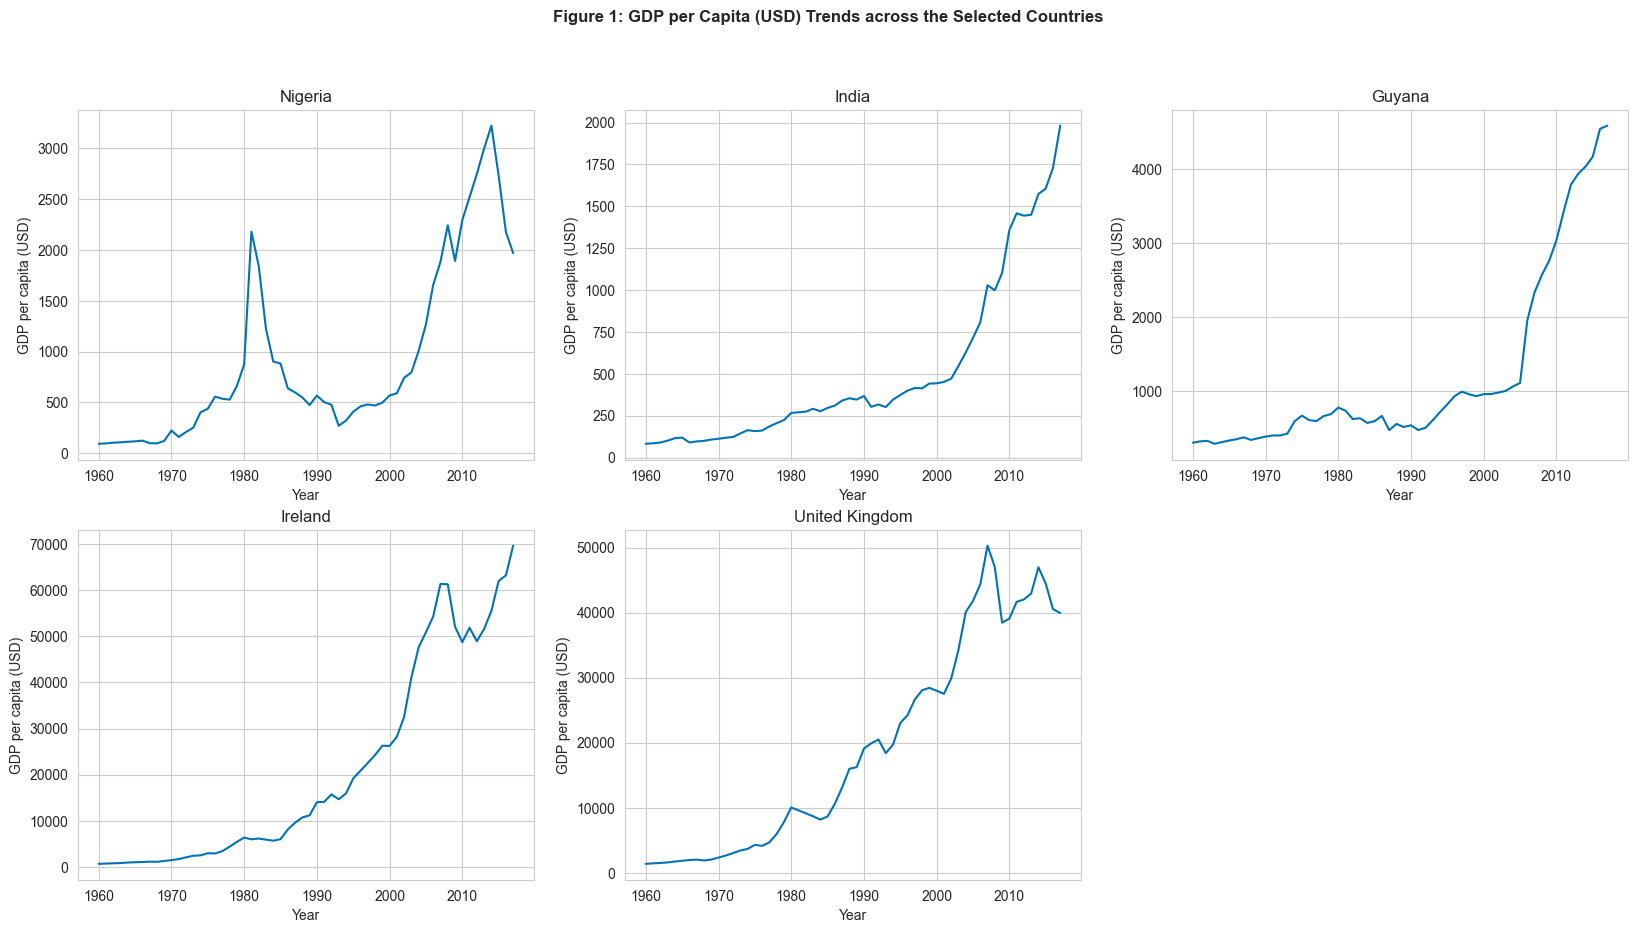

In [32]:
# GDP per capital growth over the years, for the chosen countries

from IPython.display import display

fig, ax = plt.subplots(2, 3, figsize=(20, 10))


df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[0]]
ax[0, 0].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("GDP per capita (USD)")
ax[0, 0].set_title(f"{list_of_chosen_countries[0]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[1]]
ax[0, 1].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("GDP per capita (USD)")
ax[0, 1].set_title(f"{list_of_chosen_countries[1]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[2]]
ax[0, 2].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 2].set_xlabel("Year")
ax[0, 2].set_ylabel("GDP per capita (USD)")
ax[0, 2].set_title(f"{list_of_chosen_countries[2]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[3]]
ax[1, 0].plot(df["year"], df["GDP per capita (USD)"])
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("GDP per capita (USD)")
ax[1, 0].set_title(f"{list_of_chosen_countries[3]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[4]]
ax[1, 1].plot(df["year"], df["GDP per capita (USD)"])
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("GDP per capita (USD)")
ax[1, 1].set_title(f"{list_of_chosen_countries[4]}")

fig.delaxes(ax[1, 2])

plt.suptitle(
    "Figure 1: GDP per Capita (USD) Trends across the Selected Countries",
    fontweight="bold",
)

plt.savefig(
    "Figure 1: GDP per Capita (USD) Trends across the Selected Countries.png", dpi=300
)
plt.show()

Figure 1 shows that both Ireland and Guyana display exponential growth curves. Ireland’s takeoff begins in the mid-1990s (reaching over $70k GDP per capita), while Guyana shows a vertical spike post-2015, likely as a result of recent oil discoveries. India shows consistent, smooth acceleration, which is suggestive of structured global economy regulations. In contrast, the United Kingdom shows stagnation post-2008, struggling to recover its pre-financial crisis peak. Nigeria, however, stands out for its instability. Unlike the smooth trajectories of the other countries, Nigeria’s GDP per capita peaked around 2014 before crashing. This non-linear trajectory is characteristic of a resource-dependent economy vulnerable to commodity price shocks.

A subplot was created for all 5 countries- this time visualising both the birth rate and the death rate for the UK and the four former colonies. Each subplot code was written individually one more time to ensure proper retension of the code. fig.delaxes(ax[1, 2]) was added to remove the empty subplot in the ax[1, 2] position, since we are only visualising 5 countries.  

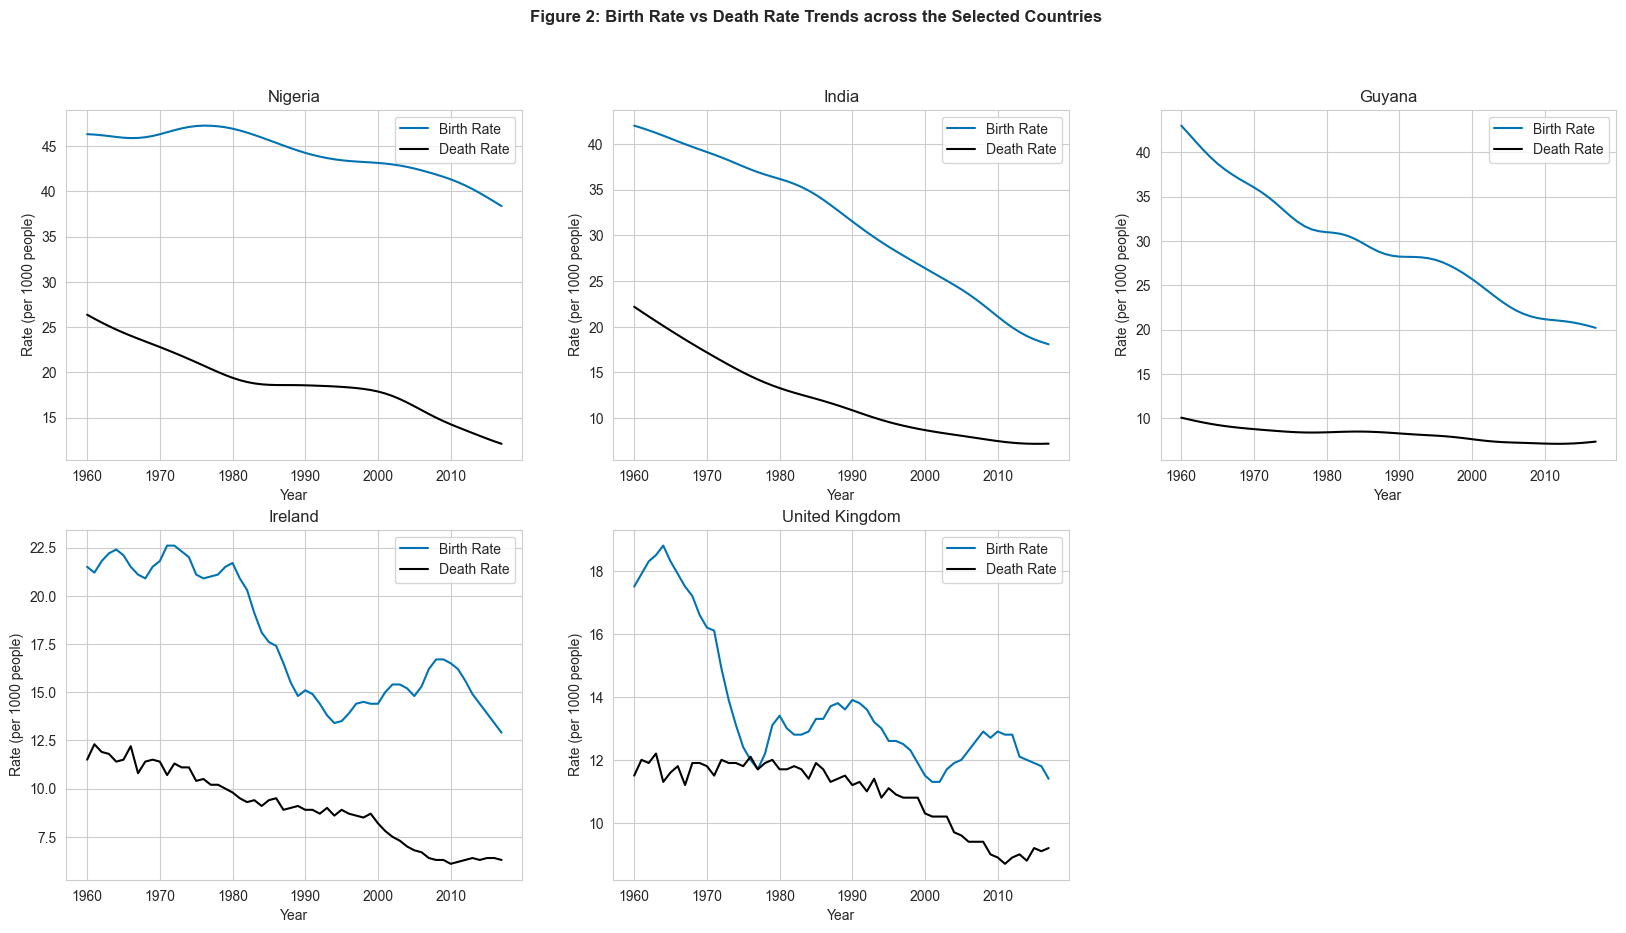

In [33]:
from IPython.display import display

fig, ax = plt.subplots(2, 3, figsize=(20, 10))


df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[0]]
ax[0, 0].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 0].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Rate (per 1000 people)")
ax[0, 0].set_title(f"{list_of_chosen_countries[0]}")
ax[0, 0].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[1]]
ax[0, 1].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 1].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Rate (per 1000 people)")
ax[0, 1].set_title(f"{list_of_chosen_countries[1]}")
ax[0, 1].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[2]]
ax[0, 2].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 2].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 2].set_xlabel("Year")
ax[0, 2].set_ylabel("Rate (per 1000 people)")
ax[0, 2].set_title(f"{list_of_chosen_countries[2]}")
ax[0, 2].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[3]]
ax[1, 0].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[1, 0].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Rate (per 1000 people)")
ax[1, 0].set_title(f"{list_of_chosen_countries[3]}")
ax[1, 0].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[4]]
ax[1, 1].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[1, 1].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Rate (per 1000 people)")
ax[1, 1].set_title(f"{list_of_chosen_countries[4]}")
ax[1, 1].legend()

fig.delaxes(ax[1, 2])

plt.suptitle(
    "Figure 2: Birth Rate vs Death Rate Trends across the Selected Countries",
    fontweight="bold",
)

plt.savefig(
    "Figure 2: Birth Rate vs Death Rate Trends across the Selected Countries.png",
    dpi=300,
)
plt.show()

For this visualisation: the gap in between the two lines represents the rising population rates- as we are comparing birth and death rates. For Nigeria, the death rate has plummeted, but the birth rate remains extremely high (~38 per 1,000). The wide gap between these lines indicates rapid population expansion. India demonstrates a narrowing gap. The birth rate is falling steeply (from ~40 to ~18), catching up with the low death rate, indicative of a stabilizing population. Ireland and the UK show some convergence, where the gap between the birth and death rates is narrowing significantly. The UK and Ireland both display a slight increase in the birth rate; possibly linked to its economic boom attracting young migrants- thus causing a slight increase in the resultant birth rate. 

The cell below creates a multivariate scatter plot; it displays three variables simultaenously for each country- with the year on the x axis, the gdp per capita on the y axis, and life expectancy displayed by the colour hue. The sorting at the start allows for the dots to appear in chronological order. A loop function is created, so that each subplot isn't coded individually like before. The Stack Overflow community and generative AI helped with the math calculations for each of the grid positions. A colour bar was added to visualise life expectancy- with viridis being assigned as the colour map (which is inclusive of the colourblind palate). 

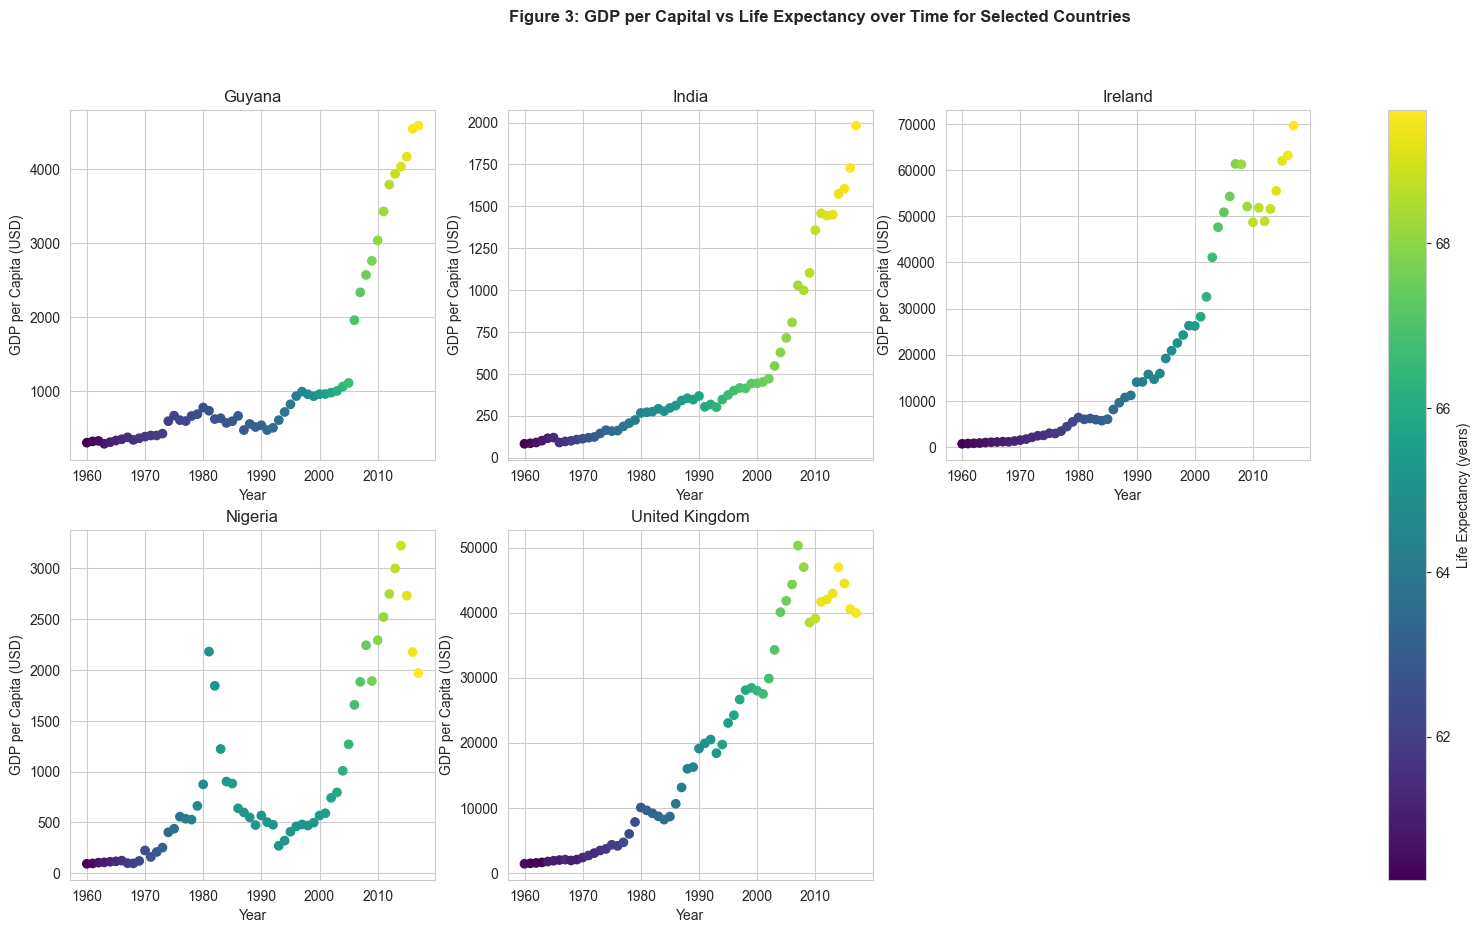

In [34]:
gdp_le = wb_filtered.sort_values(["Country Name", "year"])

width = 3
i = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

cbar_vars = []

for j, country in enumerate(gdp_le["Country Name"].unique()):
    if j >= width and j % width < 1:
        i += 1

    temp = gdp_le[gdp_le["Country Name"] == country]

    cbar_vars.append(
        ax[i, j % width].scatter(
            temp["year"],
            temp["GDP per capita (USD)"],
            c=temp["Life expectancy at birth (years)"],
            cmap="viridis",
        )
    )
    ax[i, j % width].set_xlabel("Year")
    ax[i, j % width].set_ylabel("GDP per Capita (USD)")
    ax[i, j % width].set_title(f"{country}")

fig.delaxes(ax[i, j % width + 1])

plt.suptitle(
    "Figure 3: GDP per Capital vs Life Expectancy over Time for Selected Countries",
    fontweight="bold",
)
cbar = plt.colorbar(cbar_vars[0], ax=ax.ravel().tolist(), shrink=1)
cbar.set_label("Life Expectancy (years)")

plt.savefig(
    "Figure 3: GDP per Capital vs Life Expectancy over Time for Selected Countries.png",
    dpi=300,
)
plt.show()

India and Guyana display a very linear correlation between the GDP per capita and life expectancy over time; which suggests that every dollar of GDP growth appears to translate directly into increase in health outcomes, and therefore increasing life expectancy over time. Ireland and the UK show vertical growth. Once they have reached a certain wealth threshold (~$40-50k), adding more money increased GDP (Y-axis) significantly but added very few years to life expectancy (as displayed by the faint changes of the colour hue), suggesting that they have neared biological limits of health improvement outcomes. Nigeria however is a different story; there are fluctuations of GDP per capital- espeicallu between 1980 - 2000; where the colour hue remains pretty constant which suggets that as economic growth fell, there hasn't been sustained investment in public health- resulting in a stagnant life expectancy increase. 

#### <u>HDI Dataframe Visualiations</u>

The hdim dataframe has been filtered to only display data from the selected countries that were once colonies of the British Empire. The hdi_filtered dataframe will be used to conduct visualisations for the HDI dataframe. For the hdim dataframe, it was decided to also produce some additional visualisations regarding global trends to provide analysis for global trends, as well as comparing the UK with the former colony countries. 

In [35]:
hdi_filtered = hdim[hdim["country"].isin(list_of_chosen_countries)]
hdi_filtered

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
1952,GBR,United Kingdom,Very High,NaN,18.0,1990,NaN,0.804,75.7359,13.654990,9.635440,30951.712960,NaN,0.970,0.789631,78.5040,13.715040,9.625041,21926.260010,0.814294,72.8411,13.598350,9.645839,40500.860230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255,9.0,34.556,65.623968,65.724250,11.578341,88.421659,52.497,74.436,NaN,0.665,17.288557,10.507575,20.79
1953,GBR,United Kingdom,Very High,NaN,18.0,1991,NaN,0.809,75.9098,13.926670,9.724416,30605.647880,NaN,0.970,0.793854,78.6136,14.020740,9.702265,21738.560020,0.818753,73.0805,13.837290,9.746567,39987.178130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254,9.0,34.432,66.805833,66.907921,11.578341,88.421659,52.318,73.857,NaN,0.669,17.305315,10.620043,20.49
1954,GBR,United Kingdom,Very High,NaN,18.0,1992,NaN,0.816,76.3063,14.275470,9.813392,31001.960390,NaN,0.969,0.801040,78.9624,14.367280,9.779488,22196.474810,0.826261,73.5118,14.187610,9.847296,40317.296570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250,9.0,32.916,67.987698,68.091592,11.578341,88.421659,52.470,73.151,NaN,0.677,17.034314,10.320708,20.36
1955,GBR,United Kingdom,Very High,NaN,18.0,1993,NaN,0.820,76.1627,14.486753,9.902368,31663.944450,NaN,0.970,0.805442,78.7679,14.589415,9.900342,22920.625920,0.829967,73.4410,14.387380,9.948024,40911.423680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244,10.0,31.115,69.169563,69.275263,11.578341,88.421659,52.543,72.011,NaN,0.682,16.829268,10.045353,20.39
1956,GBR,United Kingdom,Very High,NaN,18.0,1994,NaN,0.828,76.7221,14.698037,9.991344,33332.348100,NaN,0.971,0.813945,79.3070,14.811550,9.978968,24218.351700,0.838334,73.9952,14.587150,10.048753,42968.660550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238,10.0,28.795,70.351428,70.458934,11.578341,88.421659,52.589,71.671,NaN,0.688,16.908213,9.948186,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,NGA,Nigeria,Low,SSA,163.0,2017,NaN,0.526,52.3052,9.758482,6.697552,5031.603971,NaN,0.861,0.486056,52.5886,9.220344,5.647586,4026.942598,0.564510,52.0165,10.382992,7.768286,6017.440060,0.335,36.059321,36.311787,41.924824,38.09476,28.15838,NaN,0.670,917.0,103.925,36.812211,52.263521,5.769231,94.230769,49.934,60.076,NaN,0.516,1.901141,0.597482,3.23
4092,NGA,Nigeria,Low,SSA,163.0,2018,NaN,0.531,52.5536,9.937831,6.958531,4928.925873,NaN,0.860,0.490662,52.7698,9.394428,5.909182,3913.558361,0.570499,52.3311,10.584806,8.039183,5924.601224,0.335,36.649009,36.911488,41.480267,40.41507,28.05169,NaN,0.670,917.0,103.466,38.459091,53.709408,5.769231,94.230769,49.516,60.371,NaN,0.520,2.071563,0.653112,3.53
4093,NGA,Nigeria,Low,SSA,163.0,2019,NaN,0.538,52.9104,10.127584,7.181074,4971.470226,NaN,0.844,0.490424,53.1647,9.578901,6.144916,3361.297671,0.581294,52.6513,10.799039,8.249764,6549.383352,0.340,36.470631,36.802974,40.945133,40.41507,28.05169,NaN,0.683,917.0,102.807,40.357921,55.285032,4.112554,95.887446,49.098,60.665,NaN,0.526,2.230483,0.647401,3.60
4094,NGA,Nigeria,Low,SSA,163.0,2020,NaN,0.535,52.8870,10.127584,7.181074,4739.674805,NaN,0.864,0.495912,53.3226,9.578901,6.144916,3717.447742,0.574055,52.4556,10.799039,8.249764,5740.932048,0.340,36.225897,36.448598,40.210930,40.41507,28.05169,NaN,0.680,917.0,102.215,40.357921,55.285032,4.477612,95.522388,47.593,59.216,NaN,0.524,2.056075,0.608631,3.60


The groupby function separates the table into the different piles (in this case, years), and within each pile- it calculates the mean of the schooling years of male and female- and calculates the mean of all the countries in each pile- which is then produced into a table and plotted as a line chart. 

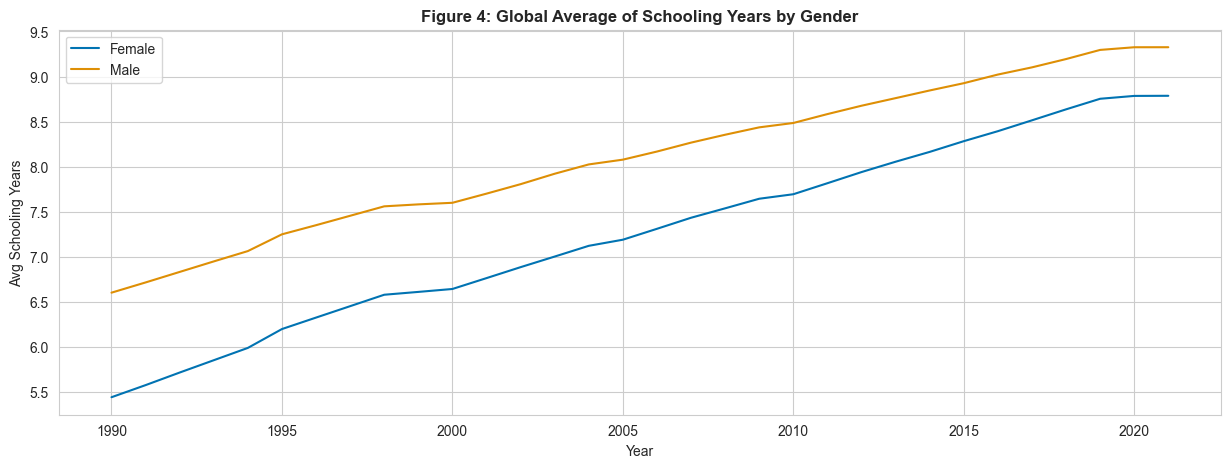

In [36]:
hdim_agg = hdim.groupby("year").agg(
    {
        "mys_f": "mean",
        "mys_m": "mean",
    }
)

plt.figure(figsize=(15, 5))
plt.plot(hdim_agg.index, hdim_agg["mys_f"], label="Female")
plt.plot(hdim_agg.index, hdim_agg["mys_m"], label="Male")

plt.xlabel("Year")
plt.ylabel("Avg Schooling Years")
plt.title("Figure 4: Global Average of Schooling Years by Gender", fontweight="bold")

plt.legend()
plt.savefig("Figure 4: Global Average of Schooling Years by Gender.png", dpi=300)
plt.show()

Figure 4 shows that on avergae, the rate schooling is rising for both genders, but the structural gap remains persistent and pretty parallel- which suggets that whilst there is increasing levels of education on avergae, globally, the gender disparity however is not reducing, indicating that the rate of inequality remains constant, despite growth. 

The cell below quantifies the magnitude of the gender disparity within education between the UK and the four former colony countries. An education gap varibale was calculated by subtracting the mean schooling years of females from the males. A pivot table is created, with the rows being countries, the columns being years and the value being the education gap variable that was calculated. A heatmap was created using the seaborn library; with a diverging colour palate. A colour bar was created and inserted to the side to display the gender disparity over the years within all 5 countries. 

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_16195/1590401468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_filtered["education_gap"] = hdi_filtered["mys_m"] - hdi_filtered["mys_f"]


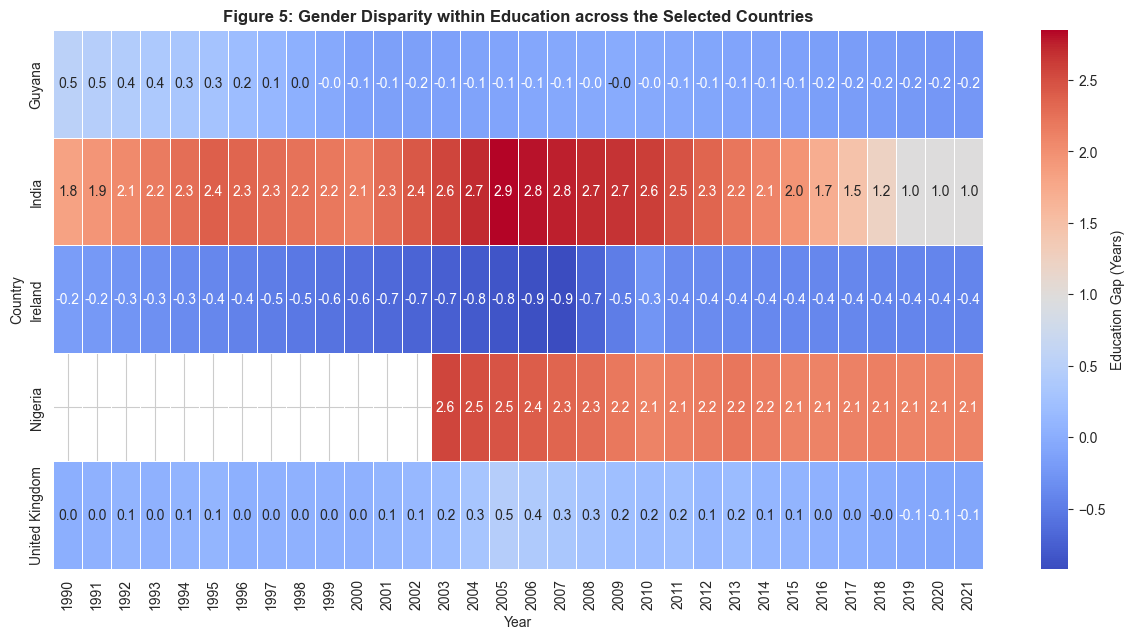

In [37]:
hdi_filtered["education_gap"] = hdi_filtered["mys_m"] - hdi_filtered["mys_f"]

heatmap_data = hdi_filtered.pivot_table(
    index="country", columns="year", values="education_gap", aggfunc="mean"
)

plt.figure(figsize=(15, 7))
figure = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Education Gap (Years)"},
)

plt.title(
    "Figure 5: Gender Disparity within Education across the Selected Countries",
    fontweight="bold",
)
plt.ylabel("Country")
plt.xlabel("Year")

figure.figure.savefig(
    "Figure 5: Gender Disparity within Education across the Selected Countries.png",
    dpi=300,
)
plt.show()

Figure 5 displays that For Ireland, the UK, and Guyana, the heatmap is dominated by blue tiles, indicating negative values. In these nations, females actually complete more years of schooling than males. India starts with a deep red (+2.9 years in 2005) but fades rapidly to light pink (+1.0 years in 2021). This visualizes the success of recent educational policy interventions, indicating that the gender disparity is successfully reducing. Nigeria, however, remains a "hotspot" (Orange/Red), indicating that while schooling is increasing (indicative from the world avergaes from Figure 4 above), it is disproportionately benefiting males.

The HvPlot library was used in the cell to produce an interactive visualisation, for exploratory data analysis. Doing a groupby function for country, allows for a dropdown menu to be created where we can select each individual country, and then visualise the Carbon Dioxide production trends of the country over time. The hover_cols=["hdicode"] fucntion increases the interactivity- it allows you to hover over a specific point, a box pops up which shows the CO2 production value and the country's HDI classification at that specific moment. 

In [38]:
ts_plot = hdim.hvplot.line(
    x="year",
    y="co2_prod",
    groupby="country",
    widget_location="left_top",
    title="Figure 6: CO2 Production Trends by Country",
    fontweight="bold",
    xlabel="Year",
    ylabel="CO2 Production",
    hover_cols=["hdicode"],
    width=500,
    height=300,
)
hvplot.save(ts_plot, "Figure 6: CO2 Production Trends by Country.html")
ts_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'7e348ae2-7193-4a34-80bf-805fb4bfd210': {'version…

A small multiple visualisation is produced to display the labour participation rate among men and female- amongst the UK and the 4 former colony countries. In this case, a small multiple is possible because both the x-axis (the year) and the y-axis (the participation percentage) can both be shared amongst the all 5 countries- therefore small multiple can be produced, negating the need for subplots. A pd.melt function was used to first reshape the data from a wide to a long format- which is required by the seaborn library, inorder to enable the facetgrid, which is a faceted visualisation. col='country' creates a separate graph for each country, the col_wrap=3 codes to start a new row after every 3rd graph. The hue plots the gender participations in two separate lines allowing for a visual assessment among the different countries.

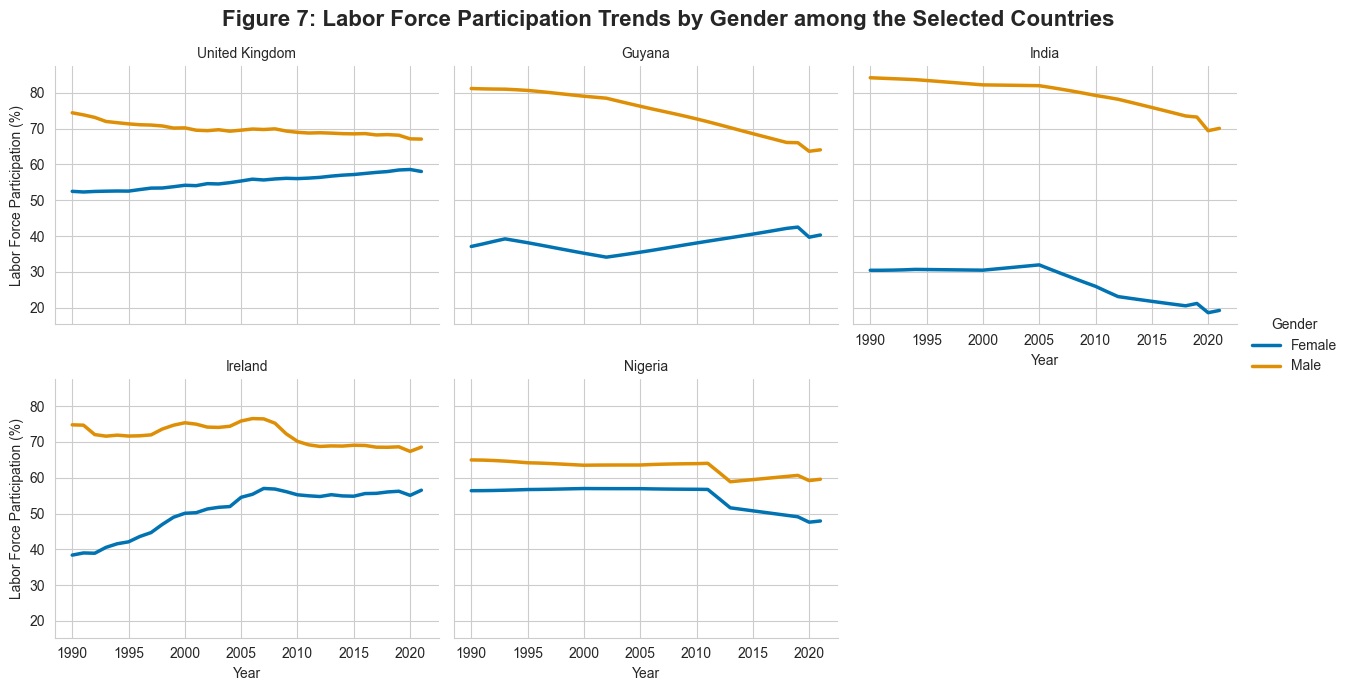

In [39]:
hdi_melted = hdi_filtered.melt(
    id_vars=["country", "year"],
    value_vars=["lfpr_f", "lfpr_m"],
    var_name="Gender",
    value_name="Participation Rate",
)
hdi_melted["Gender"] = hdi_melted["Gender"].replace(
    {"lfpr_f": "Female", "lfpr_m": "Male"}
)

g = sns.FacetGrid(hdi_melted, col="country", col_wrap=3, height=3.5, aspect=1.2)

g.map_dataframe(
    sns.lineplot, x="year", y="Participation Rate", hue="Gender", linewidth=2.5
)

g.add_legend(title="Gender")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Labor Force Participation (%)")

g.figure.suptitle(
    "Figure 7: Labor Force Participation Trends by Gender among the Selected Countries",
    fontsize=16,
    fontweight="bold",
)
g.figure.subplots_adjust(top=0.9)

fig = g.figure.get_figure()
fig.savefig(
    "Figure 7: Figure Labor Force Participation Trends by Gender among the Selected Countries.png",
    dpi=300,
)
plt.show()

Ireland shows the steepest rise in female participation in the labour force (Blue line rising from ~40% to ~55%), correlating perfectly with its GDP explosion seen in Figure 1, suggesting that the economic increase and opportunity pulled more women into the workforce. Similarly, the UK has a linear increase in  female participation of the work force, and therefore a similar conclusion can be drawn. Nigeria shows high participation for both genders with a small gap. However, this could be a result that in lower-income economies, participation is often driven by necessity and work is often in unskilled labour workforce, such as agriculture, rather than professional careers. While most countries show a rising or stable female participation, India shows a sharp decline (from ~30% in 2005 to ~20% in 2020). This could be that as a country moves from lower hdi classification to a higher one, women may often withdraw from manual labor to manage the household, only returning when professional/skilled jobs become available. A similar rate is shown for Guyana, but it does display a slight narrowing of the gap between male and female participation. The gap between the two is the gender disparity amomgst participation in the labour market. 

### <u>**Conclusion**</u>

In conclusion, the predictions made at the start of the project were proved to an extent. The colony coutries, that were classed as Very High (Ireland) or High HDI (Guyana) on average over all the visualisations displayed the highest growth- similarly to the UK. The countries classed as Medium (India) or Low HDI (Nigeria) displayed lower rates of economic growth, over the multiple economic factors analysed through the WorldBank and HDI dataframes. It can be argued that the UK, the coloniser, no longer had a greater advantage over the other countries, espeically when compared to Ireland- where the growth was pretty level. 

These visualisations can be used to give information to countries for possible changes in legislation to increase the growth. Such as for Nigeria, as evidenced by the heatmap- the gender disparity was very vast- and recommendations can be made to the goverment to focus on uptake of female students in school, which automatically will mean increase of female participation in the labour force, particualrly in the skilled work. 

Limitations of this project was that we had to do a linear intrapolation to fill in NaN's for the wb dataframe- if it were to be repeated again- perhaps a more complex imputation model could be used to better fill in those missing values. Further work could also have been done on the HDI dataframe, we kept the NaN's as it were and worked with it- perhaps more work on cleaning the dataframe could have produced a cleaner dataframe from which visualisations could be drawn. 

### <u>**References**</u>

1. Price, R. (2006). One Big Thing: Britain, Its Empire, and Their Imperial Culture. Journal of British Studies, [online] 45(3), pp.602–627. doi:https://doi.org/10.1086/503593.
2. OECD (2022). Nominal gross domestic product (GDP). [online] OECD. Available at: https://www.oecd.org/en/data/indicators/nominal-gross-domestic-product-gdp.html.
3. Sen, A. (1999). Development as Freedom. International Journal, 55(1).
4. Ayd, W. and Harrison, M. (2024). Pandas Cookbook. Packt Publishing Ltd.
5. Almustanyir, A. (2025). A Global Perspective of Color Vision Deficiency: Awareness, Diagnosis, and Lived Experiences. Healthcare, [online] 13(16), pp.2031–2031. doi:https://doi.org/10.3390/healthcare13162031. 


# Appendix

QR Code for project on GitHub


![QR Code for GitHub link](./qrcode.png)